## Unzip the Dataset and Check its Contents


In [27]:
import zipfile
import os

# Unzip the dataset
zip_path = "/content/archive.zip"
unzip_dir = "/mnt/data/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Check the contents of the unzipped directory
contents = os.listdir(unzip_dir)
contents


['preprocessed_train', 'train', 'test']

## Inspect the Contents

In [28]:
# Check the contents of the train directory
train_contents = os.listdir(os.path.join(unzip_dir, "train"))
train_contents


['tomatoes', 'apples']

In [29]:
# Check the contents of the test directory
test_contents = os.listdir(os.path.join(unzip_dir, "test"))
test_contents


['tomatoes', 'apples']

In [31]:
# Count the number of images in each subfolder of train and test directories
train_apples_count = len(os.listdir(os.path.join(unzip_dir, "train", "apples")))
train_tomatoes_count = len(os.listdir(os.path.join(unzip_dir, "train", "tomatoes")))

test_apples_count = len(os.listdir(os.path.join(unzip_dir, "test", "apples")))
test_tomatoes_count = len(os.listdir(os.path.join(unzip_dir, "test", "tomatoes")))

{
    "train_apples_count": train_apples_count,
    "train_tomatoes_count": train_tomatoes_count,
    "test_apples_count": test_apples_count,
    "test_tomatoes_count": test_tomatoes_count
}


{'train_apples_count': 164,
 'train_tomatoes_count': 130,
 'test_apples_count': 54,
 'test_tomatoes_count': 43}

## Visual Inspection of the Images

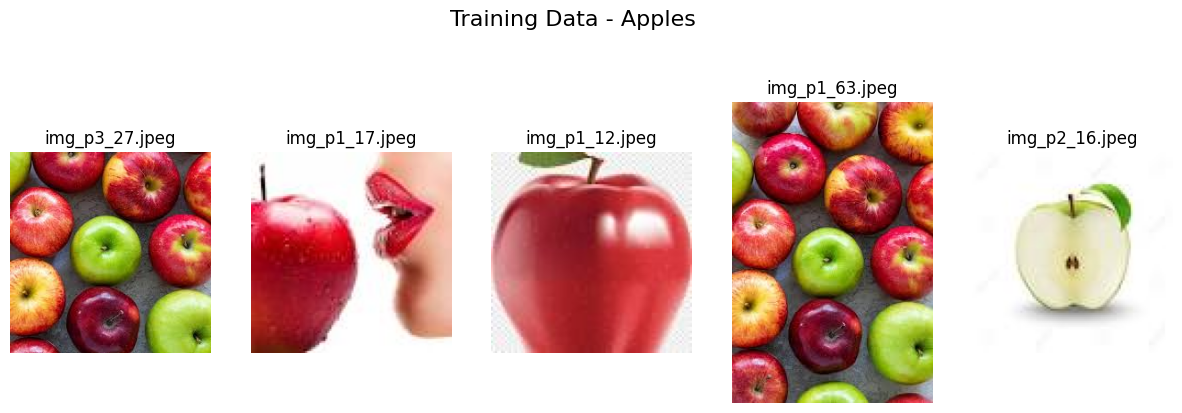

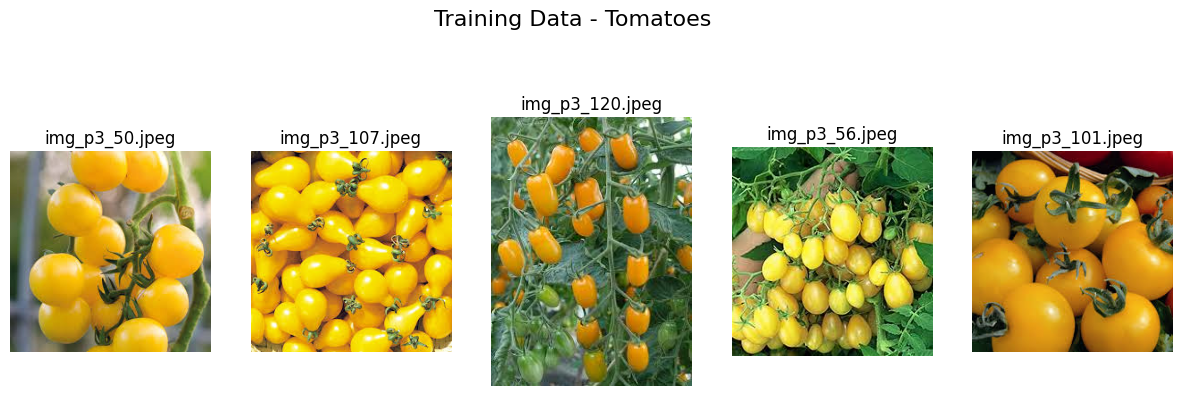

In [32]:
import matplotlib.pyplot as plt
import random
from PIL import Image

# Randomly select a few images from each category and display them
num_samples = 5

# Function to display random images from a given directory
def display_random_images(directory, title, num_samples=5):
    image_files = os.listdir(directory)
    sampled_files = random.sample(image_files, num_samples)
    images = [Image.open(os.path.join(directory, file)) for file in sampled_files]

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for ax, img, fname in zip(axes, images, sampled_files):
        ax.imshow(img)
        ax.set_title(fname)
        ax.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Display random images from apples and tomatoes in training data
display_random_images(os.path.join(unzip_dir, "train", "apples"), "Training Data - Apples", num_samples)
display_random_images(os.path.join(unzip_dir, "train", "tomatoes"), "Training Data - Tomatoes", num_samples)


## Check Image Dimensions and Formats

In [36]:
# Function to collect image dimensions and formats
def collect_image_info(directory):
    image_files = os.listdir(directory)
    image_info = []
    for img_file in image_files:
        with Image.open(os.path.join(directory, img_file)) as img:
            width, height = img.size
            img_format = img.format
            image_info.append((width, height, img_format))
    return image_info

# Collect image info for apples and tomatoes in training data
train_apples_info = collect_image_info(os.path.join(unzip_dir, "train", "apples"))
train_tomatoes_info = collect_image_info(os.path.join(unzip_dir, "train", "tomatoes"))

# Display the unique dimensions and formats found
unique_apples_dims = set([(w, h) for w, h, _ in train_apples_info])
unique_tomatoes_dims = set([(w, h) for w, h, _ in train_tomatoes_info])

unique_apples_formats = set([f for _, _, f in train_apples_info])
unique_tomatoes_formats = set([f for _, _, f in train_tomatoes_info])

{
    "unique_apples_dims": unique_apples_dims,
    "unique_tomatoes_dims": unique_tomatoes_dims,
    "unique_apples_formats": unique_apples_formats,
    "unique_tomatoes_formats": unique_tomatoes_formats
}


{'unique_apples_dims': {(100, 100),
  (150, 150),
  (159, 159),
  (176, 177),
  (177, 118),
  (178, 283),
  (180, 180),
  (183, 275),
  (183, 276),
  (187, 270),
  (194, 259),
  (196, 196),
  (201, 250),
  (206, 245),
  (208, 242),
  (212, 237),
  (215, 143),
  (215, 234),
  (216, 233),
  (218, 231),
  (219, 230),
  (223, 226),
  (224, 224),
  (224, 225),
  (225, 224),
  (225, 225),
  (227, 222),
  (228, 221),
  (230, 219),
  (234, 215),
  (242, 208),
  (248, 204),
  (251, 201),
  (255, 198),
  (258, 195),
  (259, 194),
  (259, 195),
  (260, 194),
  (261, 193),
  (275, 183),
  (275, 184),
  (281, 180),
  (284, 178),
  (288, 175),
  (290, 173),
  (291, 173),
  (294, 171),
  (299, 168),
  (300, 168),
  (301, 167),
  (310, 163),
  (311, 162),
  (318, 159)},
 'unique_tomatoes_dims': {(100, 100),
  (177, 133),
  (177, 176),
  (183, 275),
  (186, 271),
  (187, 269),
  (194, 259),
  (194, 260),
  (195, 258),
  (216, 233),
  (220, 229),
  (221, 228),
  (224, 224),
  (225, 224),
  (225, 225),
 

 ## Image Preprocessing

In [48]:
# Update the preprocessing function to handle palette-based images
def preprocess_images_updated(source_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for img_file in os.listdir(source_dir):
        with Image.open(os.path.join(source_dir, img_file)) as img:
            # Convert palette-based images to RGB
            if img.mode == 'P':
                img = img.convert('RGB')
            # Resize the image
            img_resized = img.resize(target_size)
            # Save the image in JPEG format
            img_resized.save(os.path.join(dest_dir, img_file.split('.')[0] + '.jpeg'), 'JPEG')

# Preprocess training images for apples again
preprocess_images_updated(os.path.join(unzip_dir, "train", "apples"), preprocess_apples_train_dir)

# Check the first few processed images in the directory
processed_apples_files = os.listdir(preprocess_apples_train_dir)[:5]
processed_apples_files


['img_p2_26.jpeg',
 'img_p2_108.jpeg',
 'img_p2_104.jpeg',
 'img_p3_74.jpeg',
 'img_p3_17.jpeg']

In [49]:
# Preprocess training images for tomatoes
preprocess_tomatoes_train_dir = os.path.join(unzip_dir, "preprocessed_train", "tomatoes")
preprocess_images_updated(os.path.join(unzip_dir, "train", "tomatoes"), preprocess_tomatoes_train_dir)

# Check the first few processed images in the directory
processed_tomatoes_files = os.listdir(preprocess_tomatoes_train_dir)[:5]
processed_tomatoes_files


['img_p1_74.jpeg',
 'img_p3_17.jpeg',
 'img_p3_118.jpeg',
 'img_p2_116.jpeg',
 'img_p3_88.jpeg']

## Anomaly Detection

In [50]:
# Function to compute color histogram for an image (corrected)
def compute_histogram_corrected(img_path, bins=32):
    img = Image.open(img_path)
    # Convert image to RGB (in case it's grayscale or has an alpha channel)
    img = img.convert('RGB')
    # Compute histogram for each channel separately
    r_hist = np.histogram(np.array(img)[:,:,0], bins=bins, range=(0, 256))[0]
    g_hist = np.histogram(np.array(img)[:,:,1], bins=bins, range=(0, 256))[0]
    b_hist = np.histogram(np.array(img)[:,:,2], bins=bins, range=(0, 256))[0]
    histogram = np.concatenate([r_hist, g_hist, b_hist])
    return histogram / np.sum(histogram)  # Normalize histogram

# Compute color histograms for the apples in training data again using the corrected function
apple_histograms = [compute_histogram_corrected(img_path) for img_path in apple_image_paths]

# Convert to numpy array for further processing
apple_histograms = np.array(apple_histograms)
apple_histograms.shape


IsADirectoryError: ignored

## Compute Pairwise Distances

In [46]:
from scipy.spatial.distance import cdist

# Compute pairwise distances between histograms
pairwise_distances = cdist(apple_histograms, apple_histograms, metric='euclidean')

# Compute the average distance for each image to all other images
average_distances = pairwise_distances.mean(axis=1)

# Sort images by their average distance (potential anomalies will have higher average distances)
sorted_indices = np.argsort(average_distances)[::-1]

# Get the top potential anomalies (e.g., top 5 images with highest average distances)
top_anomalies = [apple_image_paths[i] for i in sorted_indices[:5]]
average_distances_top_anomalies = average_distances[sorted_indices[:5]]

top_anomalies, average_distances_top_anomalies


NameError: ignored

NameError: ignored

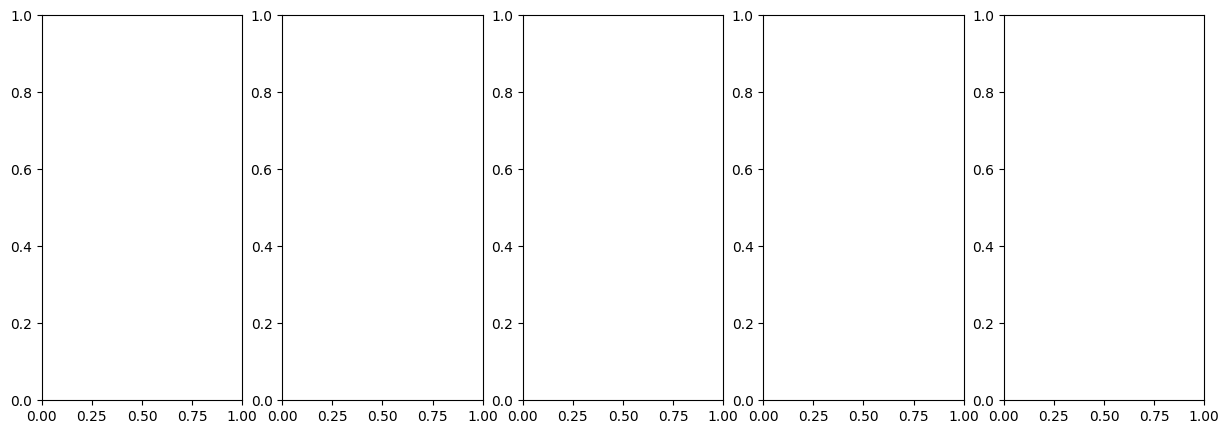

In [45]:
# Display the identified potential anomalies
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, img_path in zip(axes, top_anomalies):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(os.path.basename(img_path))
    ax.axis('off')
plt.suptitle("Potential Anomalies - Apples", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Compute color histograms for the tomatoes in training data
tomato_image_paths = [os.path.join(preprocess_tomatoes_train_dir, fname) for fname in os.listdir(preprocess_tomatoes_train_dir)]
tomato_histograms = [compute_histogram_corrected(img_path) for img_path in tomato_image_paths]

# Convert to numpy array for further processing
tomato_histograms = np.array(tomato_histograms)
tomato_histograms.shape


In [43]:
# Compute pairwise distances between histograms for tomatoes
tomato_pairwise_distances = cdist(tomato_histograms, tomato_histograms, metric='euclidean')

# Compute the average distance for each tomato image to all other images
tomato_average_distances = tomato_pairwise_distances.mean(axis=1)

# Sort images by their average distance (potential anomalies will have higher average distances)
tomato_sorted_indices = np.argsort(tomato_average_distances)[::-1]

# Get the top potential anomalies (e.g., top 5 images with highest average distances)
tomato_top_anomalies = [tomato_image_paths[i] for i in tomato_sorted_indices[:5]]
tomato_average_distances_top_anomalies = tomato_average_distances[tomato_sorted_indices[:5]]

tomato_top_anomalies, tomato_average_distances_top_anomalies


NameError: ignored

In [42]:
# Function to compute RGB distributions for an image
def compute_rgb_distributions(img_path):
    img = Image.open(img_path)
    img = img.convert('RGB')
    r_data = np.array(img)[:,:,0].flatten()
    g_data = np.array(img)[:,:,1].flatten()
    b_data = np.array(img)[:,:,2].flatten()
    return r_data, g_data, b_data

# Compute RGB distributions for the apples in training data
apple_rgb_distributions = [compute_rgb_distributions(img_path) for img_path in apple_image_paths]

# Aggregate RGB data for plotting
r_data = np.concatenate([r for r, _, _ in apple_rgb_distributions])
g_data = np.concatenate([g for _, g, _ in apple_rgb_distributions])
b_data = np.concatenate([b for _, _, b in apple_rgb_distributions])

# Plot RGB distributions
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(r_data, bins=32, color='red', alpha=0.6, label='Red Channel')
ax.hist(g_data, bins=32, color='green', alpha=0.6, label='Green Channel')
ax.hist(b_data, bins=32, color='blue', alpha=0.6, label='Blue Channel')
ax.set_title("RGB Color Distribution - Apples")
ax.set_xlabel("Color Intensity")
ax.set_ylabel("Frequency")
ax.legend()
plt.tight_layout()
plt.show()


IsADirectoryError: ignored

In [47]:
# Function to compute brightness and contrast for an image
def compute_brightness_contrast(img_path):
    img = Image.open(img_path)
    img = img.convert('L')  # Convert to grayscale
    pixel_data = np.array(img).flatten()
    brightness = np.mean(pixel_data)
    contrast = np.std(pixel_data)
    return brightness, contrast

# Compute brightness and contrast for the apples in training data
apple_brightness_contrast = [compute_brightness_contrast(img_path) for img_path in apple_image_paths]

# Aggregate brightness and contrast data for plotting
brightness_data = [b for b, _ in apple_brightness_contrast]
contrast_data = [c for _, c in apple_brightness_contrast]

# Plot brightness and contrast distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Brightness distribution
axes[0].hist(brightness_data, bins=30, color='gray', alpha=0.7)
axes[0].set_title("Brightness Distribution - Apples")
axes[0].set_xlabel("Brightness")
axes[0].set_ylabel("Frequency")

# Contrast distribution
axes[1].hist(contrast_data, bins=30, color='gray', alpha=0.7)
axes[1].set_title("Contrast Distribution - Apples")
axes[1].set_xlabel("Contrast")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


IsADirectoryError: ignored